Ayu Lestari Gunawan
2109106054

Mengimport library yang dibutuhkan yaitu pandas,matplotlib,seaborn. Kemudian membaca dataset

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
file=pd.read_csv("dataset.csv")

melihat informasi dari data

In [334]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


pendeskripsian variabel y dan label untuk pie chart

In [335]:
y=file.Species.value_counts()
labels=file.Species.unique()

Pie chart dimana didapatkan visualisasi akan banyaknya setiap Species muncul didalam data. Disimpulkan Cules Pipiens/Restuans merupakan spesies terbanyak dalam kasus,diikuti oleh Culex Restuans dan Culex Pipiens.

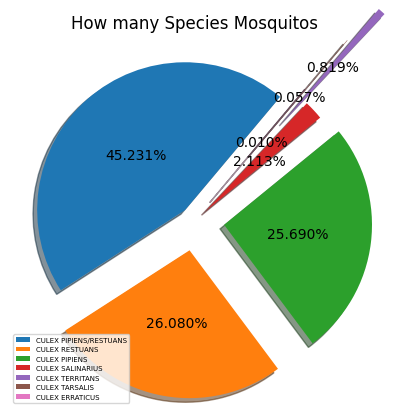

In [336]:
plt.pie(y,autopct='%1.3f%%',
        shadow=True, startangle=50, pctdistance=0.5,explode=(0.1,0.2,0.2,0.1,0.9,0.6,0.2))
plt.legend(labels,loc="lower left",prop={'size': 5})
plt.title("How many Species Mosquitos")
plt.show()

mengubah format data menjadi Datetime dimana diambil bagian tahun.

In [337]:
file.Date=pd.to_datetime(file.Date,format="%Y-%m-%d")
Date=file['Date'].dt.year
value=Date.value_counts().sort_index()
unique=value.index

Plot menampilkan naik/turunnya jumlah kasus pertahun. Dimana kasus tertinggi pada tahun 2007 kemudian menurun hingga kembali ada penaikan pada tahun 2013.

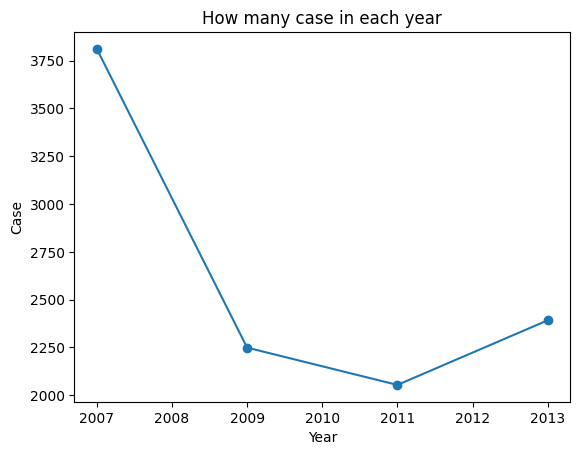

In [338]:
plt.title("How many case in each year")
plt.xlabel("Year")
plt.ylabel("Case")
plt.plot(unique,value,marker="o")

Menampilan korelasi antar atribut tanpa kolom Latitude dan Logitude. Dimana didapatkan NumMosquitos memiliki pengaruh sebesar 0.2 terhadap prediksi whvpresent. Begitu pula Block yang memiliki pengaruh >0.2 terhadap prediksi AddresAccuracy. dsb.

Text(0.5, 1.0, 'Korelasi antar artibut')

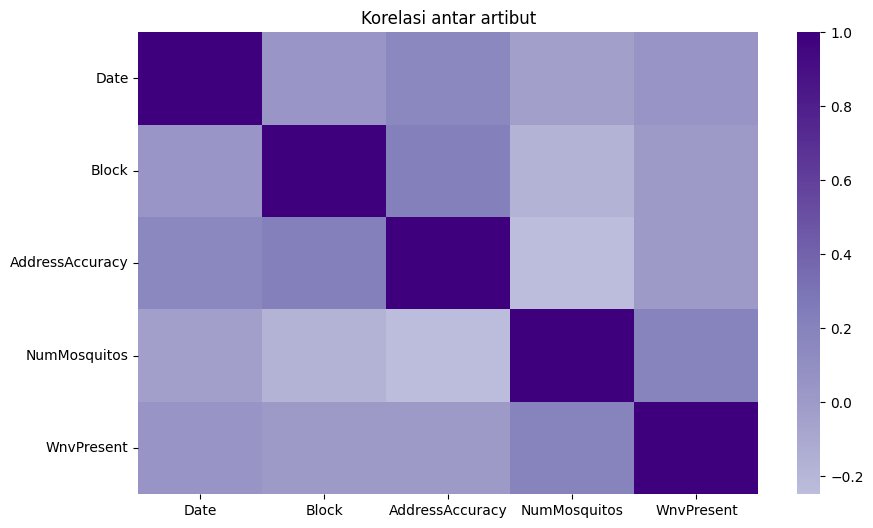

In [341]:
file1=file.drop(["Latitude","Longitude"],axis=1)
file1.Date=Date;
fig,ax=plt.subplots(figsize=(10,6))
sea.heatmap(file1.corr(),center=0,cmap="Purples")
ax.set_title("Korelasi antar artibut")

menyimpan dataset yang digunakan

In [340]:
file1.to_csv(r"HASIL_KB3.csv")